<center>
<img src="https://image.aladin.co.kr/product/12609/37/cover500/k372532974_1.jpg" width="200" height="200"><br>
</center>


 - Github: [PinkWink](https://github.com/PinkWink/DataScience)

### 시계열 데이터를 다뤄보자

- 7-1 Numpy의 polyfit으로 회귀(regression) 분석하기
- 7-2 Prophet 모듈을 이용한 forecast 예측
- 7-3 Seasonal 시계열 분석으로 주식 데이터 분석하기
- 7-4 Growth Model과 Hoidat Forcast

데이터가 시간의 흐름에 따라 변화하는 추이가 있는 데이터, 대표적으로 웹 트래픽이나 주식 같은 데이터를 예측 해야 할때 가 있다.시계열(Time Series)분석이라는 것은 통계적으로 어렵고 복잡한 작업이다. 원 데이터의 안정성을 판정하고, 안전한 형태로 변환하고, 예측 모델을 선정하고 검증하는 과정이 통계학의 깊은 지식을 요구한다. 간단히 데이터 예측하는 가벼운 느낌이라면 이 책에서는 유용한 도구, 페이스북에서 만든 fbprophet이라는 모듈이다. 그리고 터미널에서 pip install pystan과 install prophet을 수행해야한다.

### 7-1 Numpy 의 polyfit으로 회귀(regression)분석하기

In [4]:
#!pip3 install pandas_datareader

In [8]:
#!pip3 install pystan

In [9]:
#!pip3 install prophet

In [10]:
#!pip3 install fbprophet

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [7]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


필요한 모듈과 한글 폰트 문제에 대한 코드도 실행 했다.

In [9]:
pinkwink_web = pd.read_csv('./data/08. PinkWink Web Traffic.csv',
                          encoding='utf-8', thousands=',',
                          names = ['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


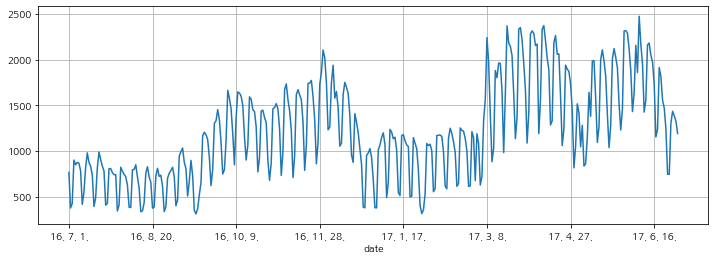

In [11]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

좀 더 정확한 주기성을 확인해 보자

In [12]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

먼저 시간축(time)을 만들고 웹 트래픽의 자료를 traffic 변수에 저장한다. 지금 우리는 결과로 보이는 그래프를 설명할 간단한 함수를 찾으려고 한다. 이러한 작업은 보통 회귀(regression)라고 한다. 그래서 모델은 1차,2차,3차,15차 다항식으로 표현하고 그 결과를 확인하자.

In [14]:
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

어떤 데이터를 어떤 모델로 표현 하려고 하면 그 모델의 적합성을 확인해야 한다. 그러기 위해서 참 값과 비교해서 에러(error)를 계산해야 한다.

In [17]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 15)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.62841018946943
330.4777304836984
330.4777304836984


책 초반 CCTV 분석에서 사용했던 polyfit 과 polyd를 사용해서 함수로 표현할 수 있다. 그렇게 해서 1차,2차,3차,15차 함수로 표현해서 확인했더니 1,2,3차는 에러가 비슷하다. 우선 그래프로 확인해보자.

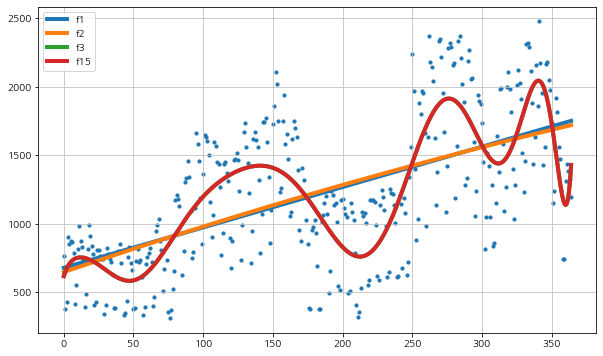

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)


plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')




plt.grid(True, linestyle='-', color='0.75')



plt.legend(loc=2)
plt.show()



데이터를 1,2,3,15차 함수로 표현한 결과를 봅시다. 1차,2차,3차가 정의된 함수에서 에러를 확인해 보니 왜 큰 차이가 없는지 알겠다. 결국 2차나 3차로 표현하려면 그냥 1차로 표현하는것이 차라리 나아 보인다. 그렇다고 15차 함수를 사용하는 것은 과적합 일수 있다. 어떤 모델을 선택할지는 결국 분석하는 사람의몫이다.

### 7-2 Prophet 모듈을 이용한 forecast 예측

Prophet 모듈은 사용법이 아주 간단하다. pinkwink_web 변수에  날짜(index)와 방문수(hit)만 따로 저장하자.

In [48]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True) 
m.fit(df);


그리고 날짜를 pandas가 지원하는 to_datetime 함수를 이용해서 날짜라고 선언하자. 그리고 Prophet 함수를 사용할 때 주기성이 연단위(yearly_seasonality)로 있다고 알려줍니다.

In [49]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


이제 이후 60일단의 데이터를 예측하고 싶다고 make_future_dataframe 명령하면 된다.

In [50]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,905.470470,709.285886,1122.013782
421,2017-08-26,490.545920,249.686560,682.573183
422,2017-08-27,623.104992,411.432099,820.056783
423,2017-08-28,1175.626329,967.641287,1393.670701
424,2017-08-29,1211.572042,1009.165916,1419.813555


그리고 예측한 데이터를 forecast 변수에 저장하자

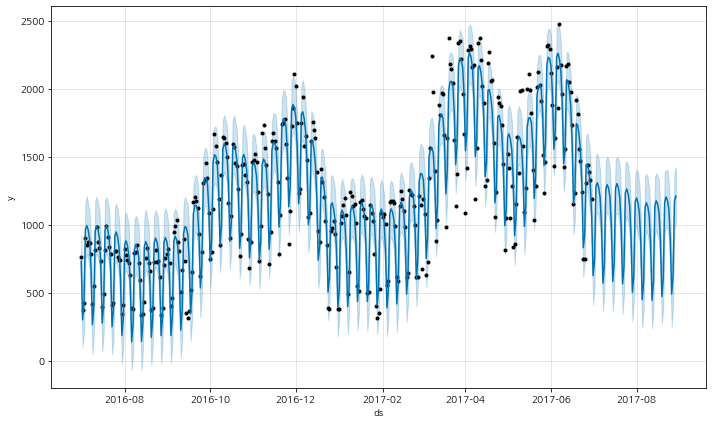

In [51]:
m.plot(forecast);

우리가 받은 2017년 6월말 까지의 데이터 이후 60일의 예측 결과가 나타났다. 단순히 다항식으로 경향을 파악하는 것보다는 뭔가 나아보인다.

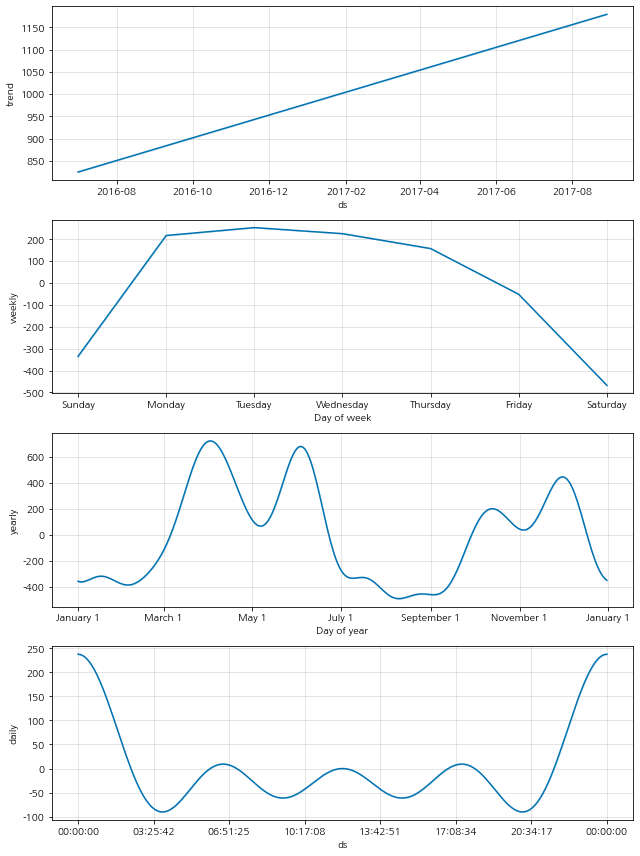

In [52]:
m.plot_components(forecast);

그리고 plot.components 명령으로 몇몇 재미난 결과를 얻을 수 있다.

Prophet을 사용해서 간략하게 제 블로그를 대상으로 흥미로운 결과를 얻었다. 앞으로의 예측부터 주별,연간 데이터의 현황도 알수 있게 되었다. 비록 빈약하긴 하지만 이러한 과정을 시계열데이터분석 이라고 한다.

### 7-3 seasonal 시계열 분석으로 주식 데이터 분석하기

pandas는 구글이 제공하는 주가 정보를 받아올 수 있는 기능이 있다. 바로 DataReaDer 함수이다. 중목 코드를 알면 kospi 주가 정보도 받아 올 수 있다.

- 생략 ...

### 7-4 Growth Model과 Holiday Forecast

이번 절부터는 prophet의 튜토리얼에 나오는 예제이다. 흐르상 도움될 듯하여 몇 줄 안되지만 실행해보겠습니다.

In [54]:
df = pd.read_csv('./data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [55]:
df['cap'] = 8.5

In [57]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

튜토리얼이 배포하는 데이터이다. 이 데이터도 제일 마지막 줄을 삭제해야 잘 작동 되기 때문에 Github에 올렸다. 이 데이터느 ㄴ주기성을 띠면서 점점 성장하는 모습의 데이터이다. 그 모양새가 마치 성장(Growth)하면서 또 로그함수(logistic)의 모양 같다.

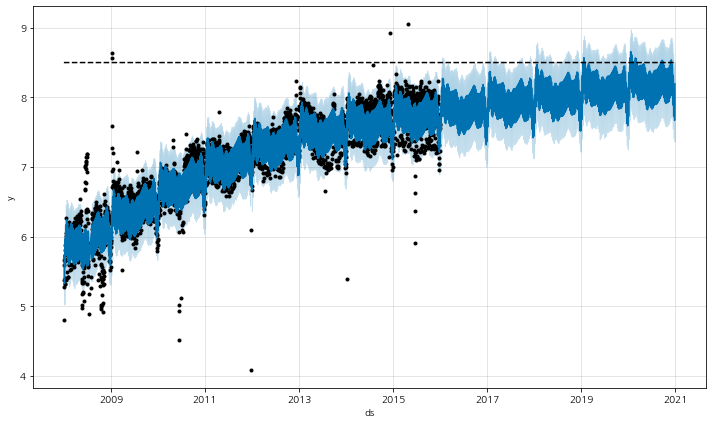

In [59]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

이런 종류의 데이터를 예측하는 것도 가능하다. 거기에 역시 components를 조사 해보겠다.

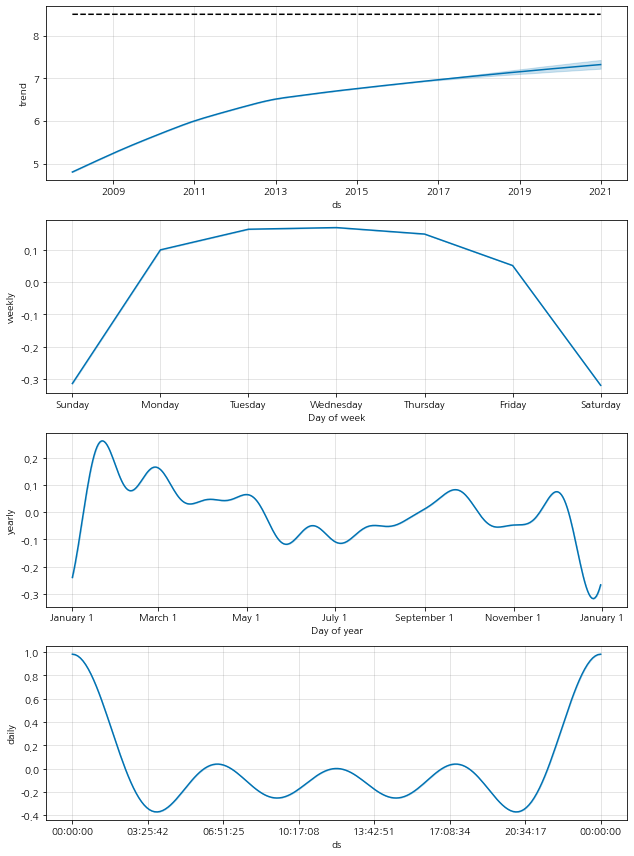

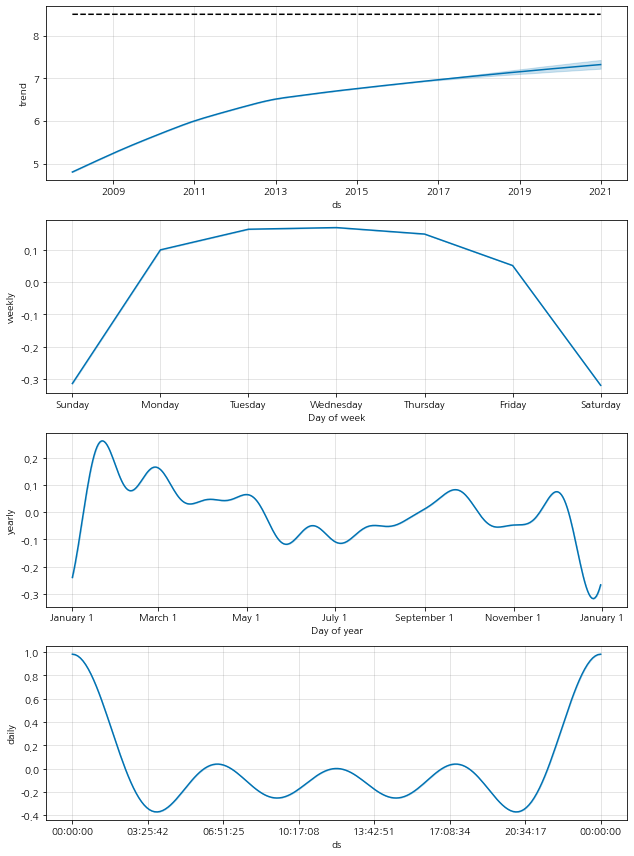

In [60]:
forecast = m.predict(future)
m.plot_components(forecast);m.plot_components(forecast);

전체적인 경향(trend)이 나타난다. 그리고 주간 분석도 나타나고있다. 또한 연간 분석의 결과도 볼 수 있다. 이번 장은 모듈을 소개하고 간단히 모듈의 사용만으로 예측(forecast)이라는 어려운 과정을 손쉽게 확인했다. 이 책에서 가장 작은 분량이지만 쓰임새는 작지 않을 것 입니다.

- 출처:[파이썬으로 데이터 주무르기]